# WEkEO application using CliMetLab

This Notebook shows a workflow of using (CliMetLab)[https://climetlab.readthedocs.io/en/latest/overview.html] python package to access and manipulate data from the WEkEO HDA. The usage of the CliMetLab brings two main benefits to the user:

**1. the data download and the file management is not user responsibility anymore, but is automatically managed by CliMetLab**

**2. the data is not downloaded in the users jupyter environment, but in cache**

**3. different file formats are invisible to the user and a direct conversion to xArray is supported**


This notebook should display the potential of the joint usage of of the HDA and the CliMetLab for an improved user experience and future implementations of serverless functions. 

# Contents

The notebook is structured as follows: 


- [Installation of packages](#Installation-of-packages)
- [Accessing a Single Dataset Using CML](#Data-Access-Without-CliMetLab)
- [Data Manipulation and Visualization in xArray](#Data-Manipulation-and-Visualization-in-xArray)
- [Accessing Multiple Datasets Using CML](#Data-Access-Using-CliMetLab)
- [Creation of a Data Cube](#Creation-of-a-datacube)


# Installation of packages


ClimetLab consists of the main package called climetlab and dataset plugins. Each dataset plugin has to be installed separately from PyPI. There are specific dataset plugins for the WEkEO HDA. 

First, install the climetlab package. 

In [ ]:
#!pip install climetlab

Second, install the WEkEO Plugin directly from the github repository. 

In [ ]:
#!git clone https://github.com/wekeo/climetlab-wekeo-source

In [ ]:
#!cd climetlab-wekeo-source

In [ ]:
#!pip install . 

Third, install the dataset plugins the same way. 

In [2]:
! git clone https://github.com/GermanoGuerrini/climetlab-wekeo-datasets

Cloning into 'climetlab-wekeo-datasets'...
remote: Enumerating objects: 1020, done.
remote: Counting objects: 100% (1020/1020), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 1020 (delta 898), reused 915 (delta 795), pack-reused 0
Receiving objects: 100% (1020/1020), 2.67 MiB | 2.89 MiB/s, done.
Resolving deltas: 100% (898/898), done.


In [3]:
#! cd climetlab-wekeo-datasets

In [4]:
#! pip install . 

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


# Accessing a Single Dataset Using CliMetLab

In [1]:
import climetlab as cml
from climetlab_wekeo_datasets import hda2cml
import xarray as xr

/home/annalenae/miniconda3/envs/xcube/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### The Dataset: Land Surface Temperature (global hourly)

<div>
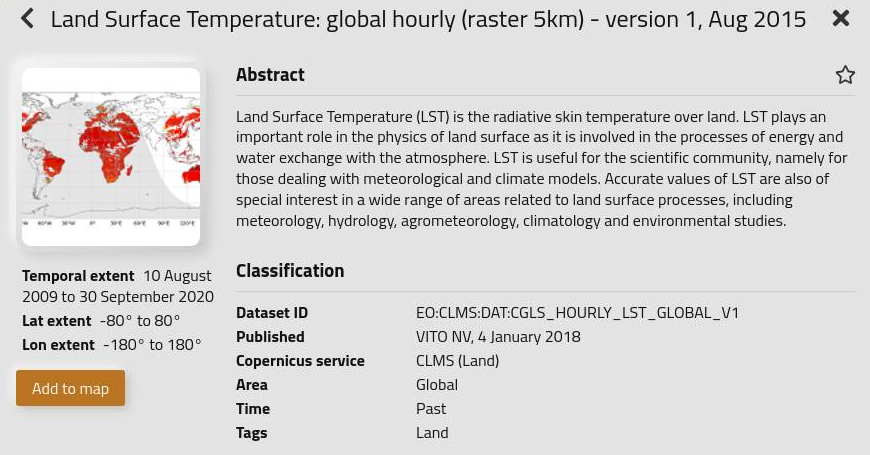
</div>

Time of interest: 1st July 2021 - 3rd July 2021

**Using the Viewer to subset the dataset and receive API request**

In [2]:
data = {
  "datasetId": "EO:CLMS:DAT:CGLS_HOURLY_LST_GLOBAL_V2",
  "dateRangeSelectValues": [
    {
      "name": "dtrange",
      "start": "2021-07-01T00:00:00.000Z",
      "end": "2021-07-02T23:59:00.000Z"
    }
  ]
}

In [3]:
ds_id, args = hda2cml(data)

In [4]:
print (ds_id)
print (args)

wekeo-clms-cgls-hourly-lst-global-v2
{'start': '2021-07-01T00:00:00.000Z', 'end': '2021-07-02T23:59:00.000Z'}


In [5]:
cml.settings.get("cache-directory")

'storage/climetlab-annalenae'

In [6]:
%%time
cmlds = cml.load_dataset(ds_id, **args)

By downloading data from this dataset, you agree to the terms and conditions defined at https://www.copernicus.eu/en/access-data/copyright-and-licenceIf you do not agree with such terms, do not download the data. 
CPU times: user 109 ms, sys: 21.8 ms, total: 131 ms
Wall time: 8.8 s


**Insert CliMetLab query directly**

In [7]:
cmlds = cml.load_dataset(
    "wekeo-clms-cgls-hourly-lst-global-v2",
    start='2021-07-01T00:00:00.000Z',
    end='2021-07-02T23:59:00.000Z',
)

In [8]:
lst = cmlds.to_xarray(xarray_open_mfdataset_kwargs={"chunks": "auto", "engine": "netcdf4"})

# Data Manipulation + Visualization with xArray

In [9]:
lst 

<xarray.Dataset>
Dimensions:              (time: 47, lat: 3584, lon: 8064)
Coordinates:
  * lat                  (lat) float64 80.0 79.96 79.91 ... -79.87 -79.91 -79.96
  * lon                  (lon) float64 -180.0 -180.0 -179.9 ... 179.9 180.0
  * time                 (time) datetime64[ns] 2021-07-01 ... 2021-07-02T23:0...
Data variables:
    ERRORBAR_LST         (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    LST                  (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    PERCENT_PROC_PIXELS  (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    Q_FLAGS              (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    TIME_DELTA           (time, lat, lon) float32 dask.array<chunksize=(1, 3584, 8064), meta=np.ndarray>
    crs                  (time) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
Attributes: (12/31)
    Conventions:                CF-1.6
    institution:                IPMA
    archive_facility:           VITO
    source:                     Data was derived from satellite imagery.
    history:                    2021-07-01T00:34:16Z - Product generation
    comment:                    Land Surface Temperature (LST) is the radiati...
    ...                         ...
    copyright:                  Copernicus Service Information 2021
    references:                 https://land.copernicus.eu/global/products/lst
    platform:                   HIMAWARI8, GOES16, MSG4, MSG1
    sensor:                     AHI, ABI, SEVIRI, SEVIRI
    product_version:            V2.0.1
    contacts:                   https://land.copernicus.eu/global/contact

It is already here possible to subset, resample etc. the dataset using xArray functions

In [10]:
lst_germany = lst.sel( lat=slice( 56, 47), lon = slice(5, 16))[['LST']]
lst_germany.attrs["title"] = "LST Germany 2021-07"

In [11]:
lst_germany

<xarray.Dataset>
Dimensions:  (time: 47, lat: 202, lon: 247)
Coordinates:
  * lat      (lat) float64 55.98 55.94 55.89 55.85 ... 47.14 47.1 47.05 47.01
  * lon      (lon) float64 5.0 5.045 5.089 5.134 ... 15.85 15.89 15.94 15.98
  * time     (time) datetime64[ns] 2021-07-01 ... 2021-07-02T23:00:00
Data variables:
    LST      (time, lat, lon) float32 dask.array<chunksize=(1, 202, 247), meta=np.ndarray>
Attributes: (12/31)
    Conventions:                CF-1.6
    institution:                IPMA
    archive_facility:           VITO
    source:                     Data was derived from satellite imagery.
    history:                    2021-07-01T00:34:16Z - Product generation
    comment:                    Land Surface Temperature (LST) is the radiati...
    ...                         ...
    copyright:                  Copernicus Service Information 2021
    references:                 https://land.copernicus.eu/global/products/lst
    platform:                   HIMAWARI8, GOES16, MSG4, MSG1
    sensor:                     AHI, ABI, SEVIRI, SEVIRI
    product_version:            V2.0.1
    contacts:                   https://land.copernicus.eu/global/contact

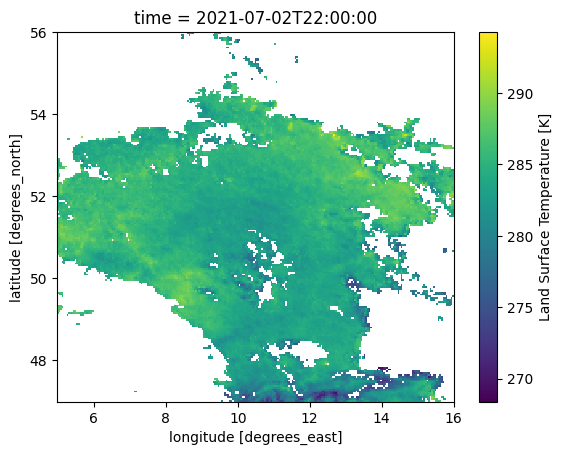

In [12]:
lst_germany.LST.isel(time=45).plot()

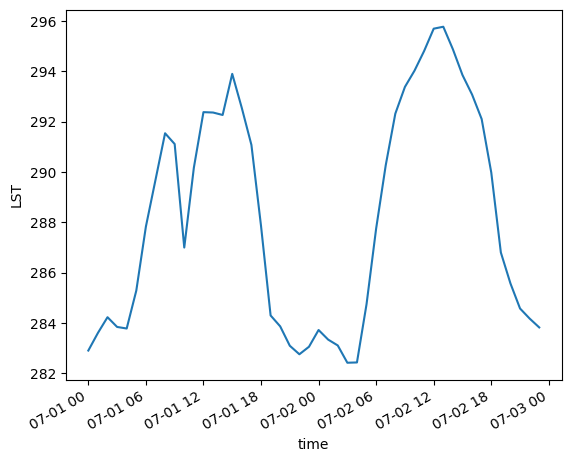

In [13]:
lst_germany.LST.mean(dim=["lat", "lon"]).plot.line(x="time")

## Accessing Multiple Datasets Using CliMetLab

After examining one day of LST over Germany, we want to take a look at the air temperatures of the same day in the same AOI. This is possible with a dataset from the Copernicus Climate Datastore - the **ERA 5 reanalysis** datasets. 


We will comare the daily air temperature with the monthly average of the air temperature. 


In [14]:
cmlds_t2m_daily = cml.load_dataset("wekeo-ecmwf-reanalysis-era5-single-levels",
                             product_type = "reanalysis",
                             month = "07",
                             year = "2021",
                             day = ["01"], 
                             time = ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00",
                                     "06:00", "07:00", "08:00", "09:00", "10:00", "11:00",
                                     "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", 
                                     "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"],
                             variable = ["2m_temperature"],
                             format_ = "netcdf",)

By downloading data from this dataset, you agree to the terms and conditions defined at https://www.copernicus.eu/en/access-data/copyright-and-licenceIf you do not agree with such terms, do not download the data. 


In [15]:
t2m_daily = cmlds_t2m_daily.to_xarray()

In [18]:
t2m_daily

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 24)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2021-07-01 ... 2021-07-01T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-13 07:28:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [16]:
cmlds_t2m_monthly = cml.load_dataset("wekeo-ecmwf-reanalysis-era5-single-levels-monthly-means",
                             product_type = "monthly_averaged_reanalysis_by_hour_of_day",
                             month = "07",
                             year = "2021", 
                             time = ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00",
                                     "06:00", "07:00", "08:00", "09:00", "10:00", "11:00",
                                     "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", 
                                     "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"],
                             variable = ["2m_temperature"],
                             format_ = "netcdf",)

By downloading data from this dataset, you agree to the terms and conditions defined at https://www.copernicus.eu/en/access-data/copyright-and-licenceIf you do not agree with such terms, do not download the data. 


In [17]:
t2m_monthly = cmlds_t2m_monthly.to_xarray()
t2m_monthly = t2m_monthly.rename({'t2m':'t2m_monthly'})

Now merge the two datasets: 
    

In [19]:
t2m_merge = t2m_daily.merge(t2m_monthly)

In [20]:
t2m_merge

<xarray.Dataset>
Dimensions:      (longitude: 1440, latitude: 721, time: 24)
Coordinates:
  * longitude    (longitude) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude     (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time         (time) datetime64[ns] 2021-07-01 ... 2021-07-01T23:00:00
Data variables:
    t2m          (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    t2m_monthly  (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-13 07:28:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Manipulate and Analyse the Dataset with xarray:

In [21]:
t2m_germany = t2m_merge.sel( latitude=slice( 56, 47), longitude = slice(5, 16))
t2m_germany.attrs["title"] = "2mtemp Germany 2021-07-01"

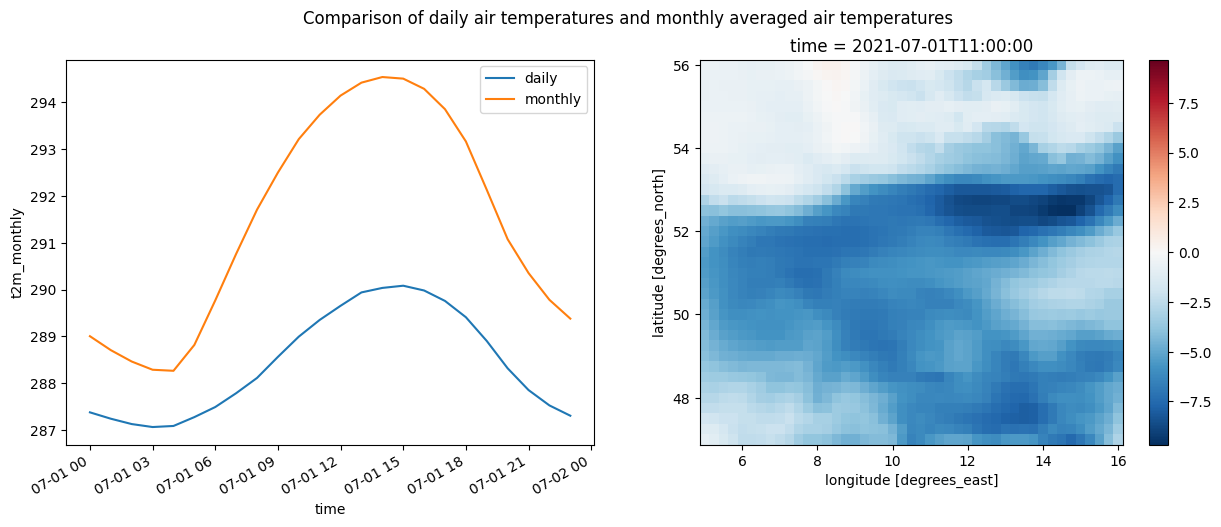

In [22]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Comparison of daily air temperatures and monthly averaged air temperatures")

t2m_germany.t2m.mean(dim=["latitude", "longitude"]).plot.line(x="time", label = "daily", ax=ax1)
t2m_germany.t2m_monthly.mean(dim=["latitude", "longitude"]).plot.line(x="time", label = "monthly", ax=ax1)
ax1.legend()

diff = t2m_germany.t2m - t2m_germany.t2m_monthly
diff.isel(time=11).plot(ax=ax2)

t2m_germany['diff'] = diff

In [23]:
t2m_germany

<xarray.Dataset>
Dimensions:      (longitude: 45, latitude: 37, time: 24)
Coordinates:
  * longitude    (longitude) float32 5.0 5.25 5.5 5.75 ... 15.25 15.5 15.75 16.0
  * latitude     (latitude) float32 56.0 55.75 55.5 55.25 ... 47.5 47.25 47.0
  * time         (time) datetime64[ns] 2021-07-01 ... 2021-07-01T23:00:00
Data variables:
    t2m          (time, latitude, longitude) float32 dask.array<chunksize=(24, 37, 45), meta=np.ndarray>
    t2m_monthly  (time, latitude, longitude) float32 dask.array<chunksize=(24, 37, 45), meta=np.ndarray>
    diff         (time, latitude, longitude) float32 dask.array<chunksize=(24, 37, 45), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-13 07:28:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
    title:        2mtemp Germany 2021-07-01

# 4. Data Export 

In [9]:
# to zarr

lst_germany.to_zarr("/home/annalenae/Demo_CML_xCube/lst_germany.zarr")
#lst.to_zarr("/home/annalenae/Demo_CML_xCube/lst_full.zarr")

ContainsGroupError: path '' contains a group

In [34]:
t2m_germany.to_zarr("/home/annalenae/Demo_CML_xCube/t2m_germany.zarr")